In [1]:
import pandas as pd
import numpy as np
import multiprocessing
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/tweets&sentiment&absoluteprices&topics.csv', index_col=0)

In [3]:
df.shape

(26231, 29)

## Feature preprocessing

### Drop features

In this step, features not useful for modelling are discarded. Such features are:
* source
* text
* created_at
* id_str
* hashtag
* mention
* neg_sentiment
* neu_sentiment
* pos_sentiment
* created_date
* created_time
* passed_closing
* market_date

In [4]:
# drop review_no, product_id and review_date
df = df.drop(columns=['source', 'text', 'created_at', 'id_str', 'hashtag', 'mention', 
                      'neg_sentiment', 'neu_sentiment', 'pos_sentiment', 'created_date',
                      'created_time', 'passed_closing'
                     ], errors='ignore')

In [5]:
df.columns

Index(['cleaned_text', 'retweet_count', 'favorite_count', 'is_retweet',
       'hashtag_count', 'mention_count', 'word_count', 'char_count',
       'word_density', 'punctuation_freq', 'upper_case_freq',
       'compound_sentiment', 'market_date', '^GSPC', '^IXIC', 'VGT', 'topic'],
      dtype='object')

### Type casting

In [6]:
df.dtypes

cleaned_text           object
retweet_count           int64
favorite_count          int64
is_retweet               bool
hashtag_count           int64
mention_count           int64
word_count              int64
char_count              int64
word_density          float64
punctuation_freq      float64
upper_case_freq       float64
compound_sentiment    float64
market_date            object
^GSPC                 float64
^IXIC                 float64
VGT                   float64
topic                   int64
dtype: object

### Correlation plot
From the correlation plot it can be seen that the meta text features have little correlation with the target variables

In [7]:
# from string import ascii_letters

In [8]:
# #sns.set_theme(style="white")

# # Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# # Compute the correlation matrix
# corr = df.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# plt.show()

### Normalise features
Normalisation is essential for deep-learning/NN-related tasks. MinMax Scaler is chosen in this case to rescale the numeric inputs.

In [9]:
# from sklearn.preprocessing import MinMaxScaler

In [10]:
# # obtain a list of numeric columns
# numeric_cols = list(df.columns)

# # remove text and output columns
# numeric_cols.remove('^GSPC')
# numeric_cols.remove('^IXIC')
# numeric_cols.remove('VGT')

In [11]:
# # scale the features
# scaler = MinMaxScaler() 
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#### Drop `cleaned_text` and `cleaned_text_w2v`

In [12]:
df = df.drop(columns=['cleaned_text', 'cleaned_text_w2v'], errors='ignore')

#### Get dummies for topic sentiment

In [13]:
df.topic.value_counts()

6     17993
2      4315
7      2412
3       356
8       291
9       253
4       187
5       160
1       134
10      130
Name: topic, dtype: int64

In [14]:
dummies = pd.get_dummies(df['topic'])

In [15]:
dum = pd.DataFrame()

In [16]:
for col in dummies.columns:
    dum[col] = dummies[col]*df['compound_sentiment']

In [17]:
dum.columns = ['topic1', 'topic2', 'topic3', 'topic4', 'topic5','topic6', 'topic7', 'topic8', 'topic9', 'topic10']

In [18]:
dum

topic1  topic2  topic3  topic4  topic5  topic6  topic7  topic8  topic9  \
0         0.0  0.0000     0.0     0.0     0.0  0.4199  0.0000     0.0     0.0   
1         0.0  0.0000     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
2         0.0  0.0000     0.0     0.0     0.0  0.4199  0.0000     0.0     0.0   
3        -0.0 -0.0000    -0.0    -0.0    -0.0 -0.7988 -0.0000    -0.0    -0.0   
4        -0.0 -0.0000    -0.0    -0.0    -0.0 -0.0000 -0.1260    -0.0    -0.0   
5         0.0  0.0000     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
6         0.0  0.0000     0.0     0.0     0.0  0.5679  0.0000     0.0     0.0   
7        -0.0 -0.0000    -0.0    -0.0    -0.0 -0.9402 -0.0000    -0.0    -0.0   
8        -0.0 -0.0000    -0.0    -0.0    -0.0 -0.8478 -0.0000    -0.0    -0.0   
9         0.0  0.0000     0.0     0.0     0.0  0.4199  0.0000     0.0     0.0   
10       -0.0 -0.0000    -0.0    -0.0    -0.0 -0.0000 -0.3182    -0.0    -0.0   
11       -0.0 -0.0000    -0.0    -0.0    -0.0 -0.9238 -0.0000    -0.0    -0.0   
12        0.0  0.0000     0.0     0.0     0.0  0.7548  0.0000     0.0     0.0   
13        0.0  0.0000     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
14        0.0  0.0000     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
15       -0.0 -0.0000    -0.0    -0.0    -0.0 -0.3252 -0.0000    -0.0    -0.0   
16        0.0  0.0000     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
17        0.0  0.8928     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
18       -0.0 -0.0000    -0.0    -0.0    -0.0 -0.0341 -0.0000    -0.0    -0.0   
19       -0.0 -0.0000    -0.0    -0.0    -0.0 -0.8260 -0.0000    -0.0    -0.0   
20        0.0  0.0000     0.0     0.0     0.0  0.4372  0.0000     0.0     0.0   
21        0.0  0.0000     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
22        0.0  0.0000     0.0     0.0     0.0  0.4199  0.0000     0.0     0.0   
23       -0.0 -0.0000    -0.0    -0.0    -0.0 -0.0572 -0.0000    -0.0    -0.0   
24        0.0  0.0000     0.0     0.0     0.0  0.0000  0.0772     0.0     0.0   
25        0.0  0.0000     0.0     0.0     0.0  0.4199  0.0000     0.0     0.0   
26        0.0  0.0000     0.0     0.0     0.0  0.0900  0.0000     0.0     0.0   
27        0.0  0.0000     0.0     0.0     0.0  0.5093  0.0000     0.0     0.0   
28        0.0  0.0000     0.0     0.0     0.0  0.0000  0.4019     0.0     0.0   
29        0.0  0.0000     0.0     0.0     0.0  0.3400  0.0000     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
26201     0.0  0.0000     0.0     0.0     0.0  0.0000  0.6249     0.0     0.0   
26202     0.0  0.0000     0.0     0.0     0.0  0.7955  0.0000     0.0     0.0   
26203     0.0  0.0000     0.0     0.0     0.0  0.4926  0.0000     0.0     0.0   
26204     0.0  0.0000     0.0     0.0     0.0  0.4738  0.0000     0.0     0.0   
26205    -0.0 -0.0000    -0.0    -0.0    -0.0 -0.0000 -0.6249    -0.0    -0.0   
26206     0.0  0.8777     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
26207     0.0  0.0000     0.0     0.0     0.0  0.6239  0.0000     0.0     0.0   
26208     0.0  0.6696     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
26209     0.0  0.1862     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
26210     0.0  0.0000     0.0     0.0     0.0  0.7500  0.0000     0.0     0.0   
26211    -0.0 -0.0000    -0.0    -0.0    -0.0 -0.1759 -0.0000    -0.0    -0.0   
26212    -0.0 -0.0000    -0.0    -0.0    -0.0 -0.0000 -0.7363    -0.0    -0.0   
26213    -0.0 -0.0000    -0.0    -0.0    -0.0 -0.4926 -0.0000    -0.0    -0.0   
26214     0.0  0.0000     0.0     0.0     0.0  0.6996  0.0000     0.0     0.0   
26215    -0.0 -0.0000    -0.0    -0.0    -0.0 -0.7424 -0.0000    -0.0    -0.0   
26216     0.0  0.0000     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
26217     0.0  0.7592     0.0     0.0     0.0  0.0000  0.0000     0.0     0.0   
26218     0.0  0.8777     0.0     0.0 

In [19]:
df = pd.concat([df, dum], axis=1)

In [20]:
df = df.drop(columns=['compound_sentiment', 'topic'], errors='ignore')

#### Concatenate the word embeddings with other features in the datasets

In [21]:
w2v_embeddings = pd.read_csv('../model/word2vec/word2vec.csv')

In [22]:
df = pd.concat([df, w2v_embeddings], axis=1)

#### Group by day

In [23]:
df = df.groupby('market_date').mean()

In [24]:
df.iloc[:,:23]

retweet_count  favorite_count  is_retweet  hashtag_count  \
market_date                                                             
2016-01-04     2660.326087     6782.043478    0.021739       0.369565   
2016-01-05     1311.800000     3935.666667    0.000000       0.200000   
2016-01-06     2070.187500     5250.812500    0.000000       0.187500   
2016-01-07     2320.153846     4770.153846    0.076923       0.000000   
2016-01-08     1755.272727     5410.545455    0.000000       0.181818   
2016-01-11     1714.692308     5128.692308    0.000000       0.358974   
2016-01-12     1304.083333     4253.083333    0.000000       0.250000   
2016-01-13     2790.312500     7156.750000    0.062500       1.062500   
2016-01-14     2137.538462     5996.461538    0.000000       0.307692   
2016-01-15     2689.400000     6766.800000    0.200000       0.400000   
2016-01-19     2429.235294     6228.431373    0.000000       0.254902   
2016-01-20     1895.000000     4778.454545    0.181818       0.454545   
2016-01-21     1818.214286     4947.214286    0.000000       0.571429   
2016-01-22     1969.846154     4277.230769    0.038462       0.807692   
2016-01-25     1746.477612     4650.716418    0.044776       0.641791   
2016-01-26     1376.416667     3895.694444    0.027778       0.333333   
2016-01-27     4053.444444    11585.444444    0.000000       0.555556   
2016-01-28     2363.342857     6374.342857    0.028571       0.400000   
2016-01-29     2760.750000     7898.350000    0.000000       0.700000   
2016-02-01     2770.702703     7262.972973    0.081081       0.432432   
2016-02-02     2634.066667     8296.466667    0.200000       0.200000   
2016-02-03     3933.500000     9688.071429    0.000000       0.428571   
2016-02-04     3465.900000     7793.500000    0.100000       0.500000   
2016-02-05     1915.000000     5956.000000    0.000000       0.875000   
2016-02-08     2205.573770     5892.475410    0.065574       0.475410   
2016-02-09     2874.846154     7612.461538    0.000000       1.000000   
2016-02-10     3832.090909    12186.181818    0.000000       0.181818   
2016-02-11     3096.333333     8807.416667    0.000000       0.166667   
2016-02-12     3010.500000     7767.437500    0.000000       0.312500   
2016-02-16     2885.492537     7918.507463    0.014925       0.402985   
...                    ...             ...         ...            ...   
2020-08-20    23691.484848    61381.909091    0.000000       0.121212   
2020-08-21    28524.950000    87977.450000    0.000000       0.350000   
2020-08-24    25280.085106    84615.829787    0.000000       0.085106   
2020-08-25    19741.761905    62657.333333    0.000000       0.428571   
2020-08-26    29410.000000   122777.333333    0.000000       0.222222   
2020-08-27     7422.250000        0.000000    0.000000       0.125000   
2020-08-28    24023.250000    96259.666667    0.000000       0.250000   
2020-08-31    13974.177778    36976.683333    0.000000       0.094444   
2020-09-01    17856.909091    62671.181818    0.000000       0.045455   
2020-09-02    17464.214286    44416.250000    0.000000       0.035714   
2020-09-03    27980.777778   107411.333333    0.000000       0.000000   
2020-09-04    20859.100000    72294.033333    0.000000       0.233333   
2020-09-08    14519.084000    29012.460000    0.000000       0.052000   
2020-09-09    12941.056604    35477.094340    0.000000       0.132075   
2020-09-10    13782.218182    42563.254545    0.000000       0.090909   
2020-09-11    18090.192308    68648.769231    0.000000       0.423077   
2020-09-14    17713.832117    43904.153285    0.000000       0.138686   
2020-09-15    12371.058824    31502.039216    0.000000       0.156863   
2020-09-16    18740.517241    51036.448276    0.000000       0.068966   
2020-09-17    17743.250000    62501.541667    0.083333       0.125000   
2020-09-18    20090.481481    78141.444444    0.037037       0.222222   
2020-09-21    19324.000000    59933.710145    0.188406       0.260870  

#### Get feature null rates

In [25]:
features = pd.concat([df.iloc[:,:10], df.iloc[:,13:23]], axis=1)

In [26]:
features.replace(0, np.nan, inplace=True) 
s = features.isnull().sum()/features.shape[0]

In [27]:
s.sort_values(ascending = False)

topic1              0.929174
topic10             0.926644
topic5              0.915683
topic4              0.897133
topic8              0.889545
topic9              0.851602
topic3              0.799325
is_retweet          0.690556
topic7              0.364250
hashtag_count       0.263912
topic2              0.176223
mention_count       0.135750
topic6              0.022766
upper_case_freq     0.006745
favorite_count      0.000843
word_count          0.000000
char_count          0.000000
word_density        0.000000
punctuation_freq    0.000000
retweet_count       0.000000
dtype: float64

### Correlation plot
From the correlation plot it can be seen that the meta text features have little correlation with the target variables

In [28]:
import seaborn as sns

In [29]:
pd.set_option('display.max_columns', None)

In [30]:
from string import ascii_letters
import seaborn as sns

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
df.iloc[:,10:23].corr()

#---------I had some error due to numpy version. Can just run your original code-----------#

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# plt.show()

^GSPC     ^IXIC       VGT    topic1    topic2    topic3    topic4  \
^GSPC    1.000000  0.970916  0.959585 -0.001850 -0.177779  0.059293  0.050307   
^IXIC    0.970916  1.000000  0.993093 -0.002429 -0.176916  0.063223  0.052208   
VGT      0.959585  0.993093  1.000000 -0.007534 -0.183947  0.059615  0.056115   
topic1  -0.001850 -0.002429 -0.007534  1.000000  0.028985 -0.013384 -0.015676   
topic2  -0.177779 -0.176916 -0.183947  0.028985  1.000000 -0.018743 -0.024886   
topic3   0.059293  0.063223  0.059615 -0.013384 -0.018743  1.000000  0.025681   
topic4   0.050307  0.052208  0.056115 -0.015676 -0.024886  0.025681  1.000000   
topic5   0.011451  0.023463  0.019147  0.010529 -0.005347  0.023552  0.030321   
topic6  -0.014123 -0.026815 -0.038550  0.007917  0.031497  0.012305 -0.031259   
topic7   0.015083  0.009204  0.007312 -0.040832  0.039618 -0.015109 -0.033934   
topic8   0.137924  0.155464  0.155763  0.007286  0.011132  0.100547  0.033255   
topic9  -0.050603 -0.044771 -0.047432 -0.034197 -0.000665  0.014238 -0.018020   
topic10 -0.000353  0.010159  0.010256  0.006463 -0.025594  0.036584  0.005220   

           topic5    topic6    topic7    topic8    topic9   topic10  
^GSPC    0.011451 -0.014123  0.015083  0.137924 -0.050603 -0.000353  
^IXIC    0.023463 -0.026815  0.009204  0.155464 -0.044771  0.010159  
VGT      0.019147 -0.038550  0.007312  0.155763 -0.047432  0.010256  
topic1   0.010529  0.007917 -0.040832  0.007286 -0.034197  0.006463  
topic2  -0.005347  0.031497  0.039618  0.011132 -0.000665 -0.025594  
topic3   0.023552  0.012305 -0.015109  0.100547  0.014238  0.036584  
topic4   0.030321 -0.031259 -0.033934  0.033255 -0.018020  0.005220  
topic5   1.000000 -0.041426 -0.055187 -0.009143 -0.041492 -0.008359  
topic6  -0.041426  1.000000  0.137150 -0.039293 -0.010239  0.048592  
topic7  -0.055187  0.137150  1.000000  0.011813  0.006746  0.010354  
topic8  -0.009143 -0.039293  0.011813  1.000000 -0.000420  0.052827  
topic9  -0.041492 -0.010239  0.006746 -0.000420  1.000000  0.002770  
topic10 -0.008359  0.048592  0.010354  0.052827  0.002770  1.000000

### Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y_GSPC = df['^GSPC']
y_IXIC = df['^IXIC']
y_VGT = df['VGT']
X = df.drop(columns=['^GSPC', '^IXIC', 'VGT'], errors='ignore')

In [33]:
# train is 75% of the entire data set
train_ratio = 0.75

#### GSPC

In [34]:
X_train_GSPC, X_test_GSPC, y_train_GSPC, y_test_GSPC = train_test_split(X, y_GSPC, test_size=1 - train_ratio, random_state=1)

#### IXIC

In [35]:
X_train_IXIC, X_test_IXIC, y_train_IXIC, y_test_IXIC = train_test_split(X, y_IXIC, test_size=1 - train_ratio, random_state=1)

#### VGT

In [36]:
X_train_VGT, X_test_VGT, y_train_VGT, y_test_VGT = train_test_split(X, y_VGT, test_size=1 - train_ratio, random_state=1)

## Modelling - XGBoost 
XGBoost is chosen to be the classification model for a few reasons:
* XGBoost is an ensemble method which helps improve machine learning results by combining and improving on the results from multiple single models.
* As compared to gradient boosting algorithms, XGBoost uses a more regularized model formalization to control over-fitting, which gives it better performance.
* XGBoost is built with the engineering goal to push the limit of computation resources for boosted tree algorithms. It utilises computational power more efficiently for faster, and production-ready training and testing, which is a good choice given the limited computation resources.

In [37]:
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### Define baseline parameters

In [38]:
params = {'objective':'reg:linear',
          'learning_rate':0.05,
          'n_estimators':200,
          'max_depth':10,
          'min_child_weight':5,
          'gamma':0.1,
          'subsample':0.7,
          'colsample_bytree':0.7,
          'n_jobs':4,
          'random_state':1,
          'seed':1
         }

### Define error metrics

Write a custom function to calculate MAPE, mean average percentage error. MAPE expresses expresses accuracy as a percentage of the error. Because the MAPE is a percentage, it can be easier to understand than the other accuracy measure statistics e.g. RMSE. Refer to the picture below for a guide on the interpretation of MAPE values

<img src="https://www.researchgate.net/profile/Albert_Sese/publication/257812432/figure/tbl1/AS:601657310203931@1520457689632/nterpretation-of-typical-MAPE-values.png" width=300 align="left"/>

In [39]:
# define custom functions to calculate MAPE

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

### GSPC

In [40]:
# initialise an xgboost object
xgb_GSPC = xgboost.XGBModel(**params)

In [44]:
xgb_GSPC.fit(X_train_GSPC.values, y_train_GSPC,
             eval_set=[(X_train_GSPC.values, y_train_GSPC), (X_test_GSPC.values, y_test_GSPC)], #added  .values to prevent error for shap
             eval_metric='rmse',
             verbose=50)

[23:49:10] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2530.47339	validation_1-rmse:2550.64160
[50]	validation_0-rmse:249.01321	validation_1-rmse:309.96396
[100]	validation_0-rmse:52.58126	validation_1-rmse:206.77422
[150]	validation_0-rmse:21.55591	validation_1-rmse:202.95409
[199]	validation_0-rmse:10.66449	validation_1-rmse:202.01149
[23:49:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
         interaction_constraints='', learning_rate=0.05, max_delta_step=0,
         max_depth=10, min_child_weight=5, monotone_constraints='()',
         n_estimators=200, n_jobs=4, num_parallel_tree=1,
         objective='reg:linear', random_state=1, reg_alpha=0, reg_lambda=1,
         scale_pos_weight=1, seed=1, subsample=0.7, tree_method='exact',
         validate_parameters=1)

In [45]:
evals_result_GSPC = xgb_GSPC.evals_result()
evals_result_GSPC

{'validation_0': {'rmse': [2530.473389,
   2406.154297,
   2287.383301,
   2175.530273,
   2069.105469,
   1967.888184,
   1870.994751,
   1780.535278,
   1693.832153,
   1611.69458,
   1534.18335,
   1460.059814,
   1389.932495,
   1323.311035,
   1260.272583,
   1200.21814,
   1143.497925,
   1089.860596,
   1038.19812,
   989.351746,
   943.254089,
   898.794983,
   856.756104,
   816.913269,
   779.516907,
   743.810364,
   709.618774,
   677.695251,
   647.034973,
   618.221497,
   590.254395,
   563.994507,
   538.770813,
   515.000671,
   492.415833,
   470.863098,
   450.156494,
   430.714966,
   412.014099,
   394.158691,
   377.158325,
   361.206085,
   346.147217,
   331.599854,
   318.148834,
   305.134369,
   292.790131,
   281.084991,
   269.63382,
   258.987579,
   249.013214,
   239.406494,
   229.993286,
   221.264389,
   212.663757,
   204.382767,
   196.676651,
   189.346298,
   182.229218,
   175.334167,
   169.5056,
   163.203674,
   157.385529,
   151.941666,
   1

In [46]:
xgb_GSPC.feature_importances_

array([0.23241268, 0.04046396, 0.00619733, 0.01208237, 0.01286511,
       0.04003272, 0.11260409, 0.00295925, 0.01302637, 0.01631411,
       0.00524182, 0.00659657, 0.00736506, 0.00626346, 0.00198515,
       0.00481824, 0.00453966, 0.0038093 , 0.00465187, 0.02336492,
       0.00307128, 0.00528024, 0.00766978, 0.01522571, 0.02093792,
       0.00992075, 0.00603794, 0.00925627, 0.0033159 , 0.00677189,
       0.00473672, 0.01188965, 0.00299691, 0.00984489, 0.0105965 ,
       0.0055868 , 0.00720633, 0.0139458 , 0.01137689, 0.00386806,
       0.0034794 , 0.00810399, 0.00525432, 0.00766129, 0.00532759,
       0.00431514, 0.00383564, 0.00257353, 0.00606592, 0.00369902,
       0.01064054, 0.00948492, 0.00332375, 0.00773789, 0.00394769,
       0.00571974, 0.00679007, 0.00538558, 0.00530873, 0.00629044,
       0.00813646, 0.00487493, 0.00439216, 0.00349005, 0.00786517,
       0.01104736, 0.00361873, 0.00349095, 0.00353143, 0.00987917,
       0.00307838, 0.01403902, 0.00549176, 0.012336  , 0.00330

#### feature importance

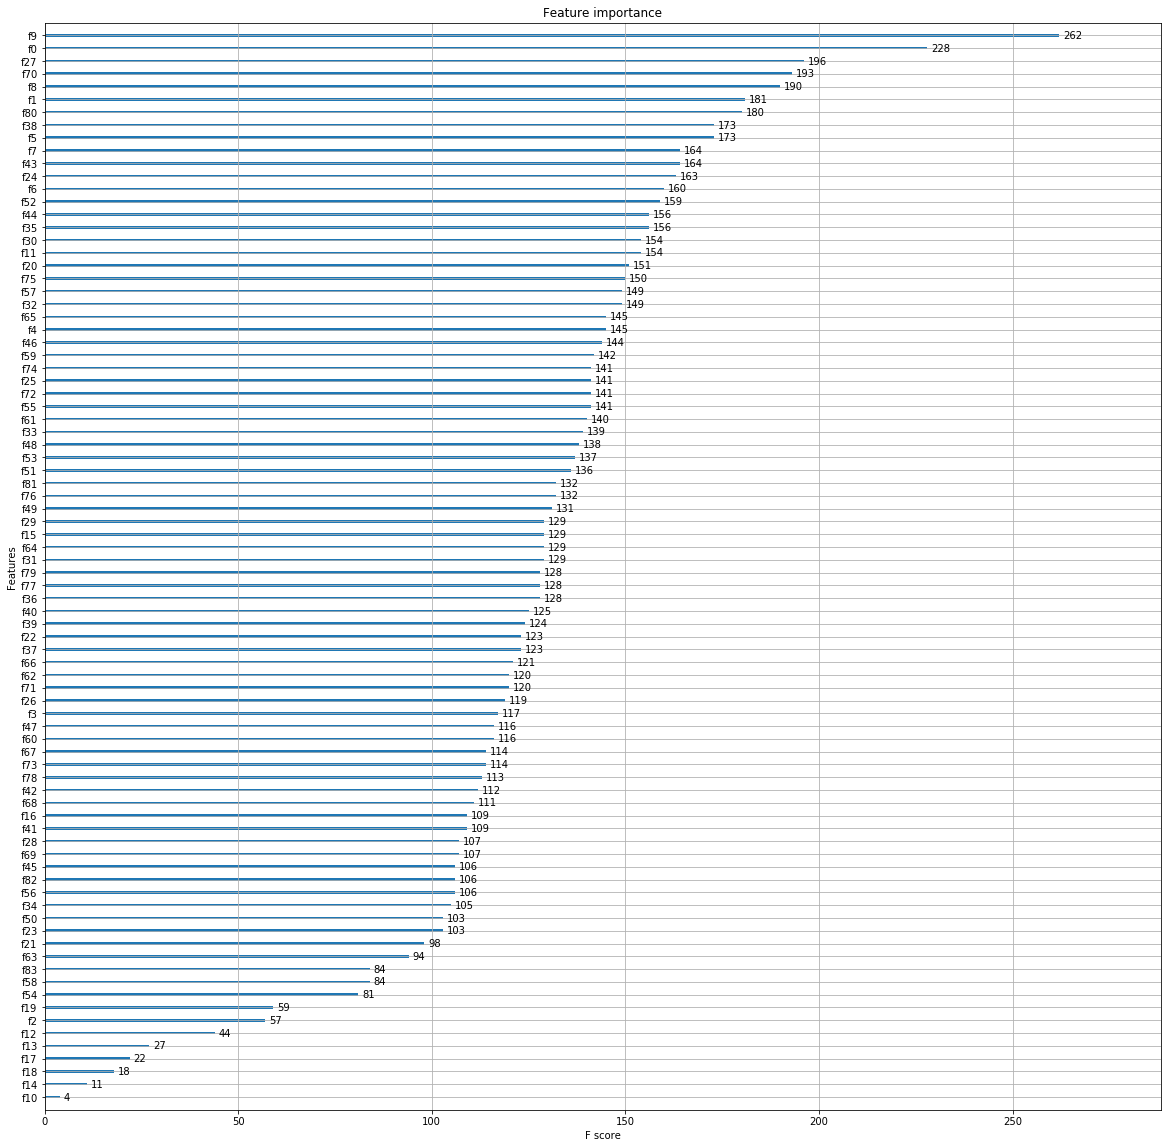

In [47]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20,20))
plot_importance(xgb_GSPC, ax=ax)
plt.show()

### shap

In [48]:
import shap
import warnings

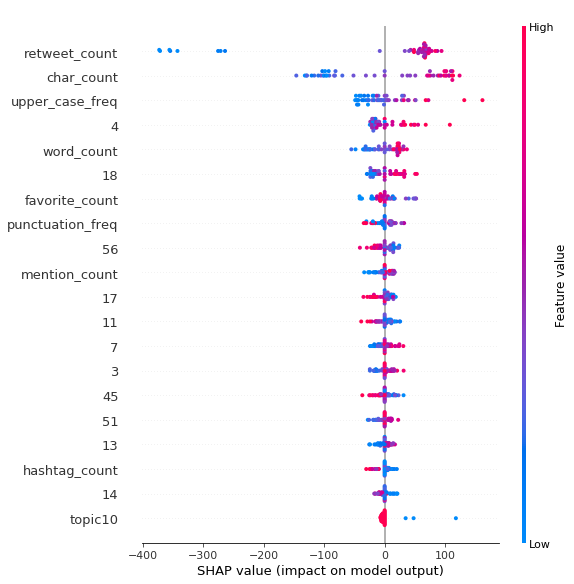

In [49]:
data_for_prediction = X_train_GSPC[:50]   # 50 here means plot the shap for the first 50 observations
explainer = shap.KernelExplainer(xgb_GSPC.predict, data_for_prediction)

warnings.simplefilter("ignore")
shap_values = explainer.shap_values(data_for_prediction)

shap.summary_plot(shap_values, data_for_prediction)


In [50]:
shap.initjs()

In [51]:
# select any obeservation to be plotted (5 here means the 5th day)

shap.force_plot(explainer.expected_value, shap_values[5,:], 
                data_for_prediction.iloc[5,:])

In [52]:
shap.force_plot(explainer.expected_value, shap_values[10,:], 
                data_for_prediction.iloc[10,:])

In [55]:
shap.force_plot(explainer.expected_value, shap_values[30,:], 
                data_for_prediction.iloc[30,:])

In [56]:
xgb_GSPC.predict(X_test_GSPC.values)

array([2394.0278, 2795.207 , 3137.7383, 2715.7656, 2672.9944, 3224.9165,
       2790.5378, 2920.1333, 2292.1953, 1989.5398, 2487.5496, 2853.0425,
       2777.0657, 2367.375 , 2516.3267, 3304.6482, 3078.0437, 2851.8901,
       2768.711 , 3177.2578, 2945.4463, 2718.583 , 2165.2117, 3172.0105,
       2699.8638, 2491.602 , 3183.9338, 2800.1526, 2702.1326, 2064.6318,
       2131.386 , 2484.2632, 2803.7493, 2642.9604, 2862.4617, 2134.0808,
       2510.5557, 2123.5989, 3018.1287, 2603.0767, 2460.1858, 2510.6052,
       2121.0781, 2766.2104, 2871.3853, 3152.7397, 2518.8347, 2069.0662,
       2744.8142, 2137.6357, 2693.809 , 2202.516 , 2389.4148, 2635.5498,
       3045.3875, 2806.7815, 1998.9844, 1952.2114, 3020.6892, 2806.19  ,
       2641.1243, 2653.4294, 2612.4846, 2563.119 , 2714.6633, 2388.3677,
       2496.6953, 2672.1038, 2629.3518, 2934.7122, 3081.2046, 2664.444 ,
       2800.7878, 3070.3584, 2793.6191, 2986.611 , 2932.5593, 2776.8289,
       2994.5107, 2999.252 , 2751.7153, 2717.167 , 

In [59]:
y_test_GSPC

market_date
2017-07-21    2472.540039
2019-12-31    3230.780029
2020-02-25    3128.209961
2018-08-17    2850.129883
2018-05-29    2689.860107
2019-12-20    3221.219971
2019-06-27    2924.919922
2020-07-29    3258.439941
2016-10-25    2143.159912
2016-04-29    2065.300049
2017-02-03    2297.419922
2019-03-12    2791.520020
2018-02-16    2732.219971
2016-06-24    2037.410034
2018-02-09    2619.550049
2020-02-03    3248.919922
2019-10-22    2995.989990
2019-09-16    2997.959961
2017-12-01    2642.219971
2019-09-26    2977.620117
2019-12-03    3093.199951
2018-09-18    2904.310059
2016-10-19    2144.290039
2020-01-15    3289.290039
2019-03-21    2854.879883
2017-08-11    2441.320068
2019-10-21    3006.719971
2017-12-08    2651.500000
2019-02-21    2774.879883
2016-10-20    2141.340088
                 ...     
2019-06-25    2917.379883
2016-09-20    2139.760010
2016-10-05    2159.729980
2018-08-13    2821.929932
2020-04-17    2874.560059
2020-02-07    3327.709961
2020-01-02    3257.850098


In [62]:
# retrieve the MSE on the test set
from math import sqrt
sqrt(mean_squared_error(xgb_GSPC.predict(X_test_GSPC.values), y_test_GSPC)) #RMSE

202.01148703664646

In [63]:
# retrieve the MAPE on the test set
mean_absolute_percentage_error(y_test_GSPC, xgb_GSPC.predict(X_test_GSPC.values)) #MAPE

5.292884908754803

#### IXIC

In [64]:
dtrain_IXIC = xgboost.DMatrix(data=X_train_IXIC, label=y_train_IXIC)
dtest_IXIC = xgboost.DMatrix(data=X_test_IXIC, label=y_test_IXIC)

In [65]:
cv_results_IXIC = xgboost.cv(dtrain=dtrain_IXIC, 
                             params=params, 
                             nfold=10, 
                             num_boost_round=200,
                             early_stopping_rounds=10,
                             metrics="rmse", 
                             as_pandas=True,
                             verbose_eval=10,
                             seed=1)

[23:51:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:51:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:51:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:51:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if yo

In [66]:
cv_results_IXIC.tail()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
157        91.648279        7.560146      908.082977      72.773361
158        90.576013        7.398394      907.941687      72.814053
159        89.644741        7.427831      908.032477      72.917050
160        88.727487        7.350419      907.793805      72.895411
161        87.592323        7.332852      907.719104      73.003694

In [67]:
cv_results_IXIC['test-rmse-mean'].min()

907.7191041

In [68]:
xgb_IXIC = xgboost.train(
                        params,
                        dtrain_IXIC,
                        num_boost_round=200,
                        evals=[(dtest_IXIC, "Test")],
                        early_stopping_rounds=10,
                        verbose_eval=10
                        )

[23:51:17] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:51:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:6964.78125
Will train until Test-rmse hasn't improved in 10 rounds.
[10]	Test-rmse:4284.66992
[20]	Test-rmse:2734.92603
[30]	Test-rmse:1864.01367
[40]	Test-rmse:1393.12390
[50]	Test-rmse:1149.93250
[60]	Test-rmse:1032.09949
[70]	Test-rmse:972.04547
[80]	Test-rmse:941.65192
[90]	Test-rmse:923.21039
[100]	Test-rmse:915.80341
[110]	Test-rmse:909.08044
[120]	Test-rmse:905.60504
[130]	Test-rmse:902.71051
[140]	Test-rmse:900.93897
[150]	Test-rmse:900.60040
[160]	Test-rmse:899.

In [69]:
# retrieve the RMSE on the test set
from math import sqrt
sqrt(mean_squared_error(xgb_IXIC.predict(dtest_IXIC), y_test_IXIC)) #RMSE

898.8448040339406

In [70]:
# retrieve the MAPE on the test set
mean_absolute_percentage_error(y_test_IXIC, xgb_IXIC.predict(dtest_IXIC)) #MAPE

8.368712380349395

#### VGT

In [71]:
dtrain_VGT = xgboost.DMatrix(data=X_train_VGT, label=y_train_VGT)
dtest_VGT = xgboost.DMatrix(data=X_test_VGT, label=y_test_VGT)

In [72]:
cv_results_VGT = xgboost.cv(dtrain=dtrain_VGT, 
                             params=params, 
                             nfold=10, 
                             num_boost_round=200,
                             early_stopping_rounds=10,
                             metrics="rmse", 
                             as_pandas=True,
                             verbose_eval=10,
                             seed=1)

[23:51:18] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:51:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:51:18] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:51:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if yo

In [73]:
cv_results_VGT.tail()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
166         2.398947        0.167185       30.667480       3.348846
167         2.371471        0.168088       30.663059       3.347293
168         2.345868        0.168403       30.660916       3.348221
169         2.319286        0.169001       30.660847       3.349477
170         2.294689        0.166552       30.660092       3.347083

In [74]:
cv_results_VGT['test-rmse-mean'].min()

30.6600915

In [75]:
xgb_VGT = xgboost.train(
                        params,
                        dtrain_VGT,
                        num_boost_round=200,
                        evals=[(dtest_VGT, "Test")],
                        early_stopping_rounds=10,
                        verbose_eval=10
                        )

[23:51:25] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:51:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:174.42215
Will train until Test-rmse hasn't improved in 10 rounds.
[10]	Test-rmse:109.78491
[20]	Test-rmse:72.51097
[30]	Test-rmse:52.27848
[40]	Test-rmse:41.42284
[50]	Test-rmse:36.17691
[60]	Test-rmse:33.90636
[70]	Test-rmse:32.75235
[80]	Test-rmse:32.06482
[90]	Test-rmse:31.69691
[100]	Test-rmse:31.60565
[110]	Test-rmse:31.42141
[120]	Test-rmse:31.34823
[130]	Test-rmse:31.31694
[140]	Test-rmse:31.25368
[150]	Test-rmse:31.20566
[160]	Test-rmse:31.18464
[170]	Test-rmse:

In [76]:
# retrieve the RMSE on the test set
from math import sqrt
sqrt(mean_squared_error(xgb_VGT.predict(dtest_VGT), y_test_VGT)) #RMSE

31.11765736519011

In [77]:
# retrieve the MAPE on the test set
mean_absolute_percentage_error(y_test_VGT, xgb_VGT.predict(dtest_VGT)) #MAPE

12.355718439014694